In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#basics
import sys,os
sys.path.insert(1, os.path.dirname(os.getcwd()))

#utils
import paths

#main libraries
import pandas as pd

#model Libraries
from sklearn import utils
from sklearn import preprocessing

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GroupKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [3]:
#private modules 
#data
from src.data import make_dataset

#utils
from src.utils import memory_usage

#model
from src.models import train_model
from src.models import evaluation

In [4]:
%%time
df_training,features,target = make_dataset.get_data(nrows=None,
                                                    low_memory=False, 
                                                    dataset="training", 
                                                    feather=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501808 entries, 0 to 501807
Columns: 314 entries, id to target_kazutsugi
dtypes: float32(311), int32(1), object(2)
memory usage: 604.9+ MB
None
CPU times: user 1.24 s, sys: 3.26 s, total: 4.5 s
Wall time: 6.56 s


In [5]:
%%time
df_validation,features,target = make_dataset.get_data(nrows=100,
                                                    low_memory=True, 
                                                    dataset="validation", 
                                                    feather=True)

low memory activated
Memory usage after optimization is: 0.06 MB
Decreased by 49.0%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 314 entries, id to target_kazutsugi
dtypes: float16(311), int32(1), object(2)
memory usage: 62.8+ KB
None
CPU times: user 809 ms, sys: 686 ms, total: 1.5 s
Wall time: 1.33 s


In [6]:
memory_usage.memory()

Available memory (%): 17.9595947265625


### 2a parte Pycaret

melhor guia: https://towardsdatascience.com/announcing-pycaret-2-0-39c11014540e

In [5]:
from pycaret.regression import *

In [6]:
ml_setup = setup(data=df_training, 
                 ignore_features = ["id","era","data_type"],
                 target=target, 
                 train_size=0.8, 
                 session_id=1234)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1234
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(501808, 314)"
4,Missing Values,False
5,Numeric Features,311
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
#models()

In [9]:
%%time
best_model, leaderboard  = compare_models(fold=3, 
                                          sort='MSE',  
                                          whitelist = ['ridge', 'lasso', 'en', 'lr', 
                                                       'lar', 'llar', 'omp', 'br', 'ard'], 
                                          turbo=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Orthogonal Matching Pursuit,0.3012,0.1244,0.3527,0.0015,0.2461,0.4623,1.3055
1,Bayesian Ridge,0.3009,0.1244,0.3527,0.0019,0.2461,0.4616,37.0157
2,Ridge Regression,0.3017,0.1245,0.3528,0.0013,0.2461,0.4637,6.7043
3,Linear Regression,0.3017,0.1245,0.3528,0.0013,0.2461,0.4637,6.2805
4,Automatic Relevance Determination,0.3008,0.1245,0.3529,0.0009,0.2462,0.4607,14.4360
5,Lasso Regression,0.2991,0.1246,0.3530,-0.0000,0.2463,0.4565,2.7285
6,Elastic Net,0.2991,0.1246,0.3530,-0.0000,0.2463,0.4565,2.0007
7,Least Angle Regression,0.3022,0.1246,0.3530,-0.0002,0.2463,0.4649,1.4324
8,Lasso Least Angle Regression,0.2991,0.1246,0.3530,-0.0000,0.2463,0.4565,1.4809


CPU times: user 3min 49s, sys: 2min 25s, total: 6min 14s
Wall time: 6min 26s


In [10]:
leaderboard.to_excel("../../reports/pycaret_compare_results.xlsx",
             sheet_name='Sheet_name_1', index=False)

In [11]:
load_table = pd.read_excel("../../reports/pycaret_compare_results.xlsx", index=True)
load_table

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Orthogonal Matching Pursuit,0.3012,0.1244,0.3527,0.0015,0.2461,0.4623,1.3055
1,Bayesian Ridge,0.3009,0.1244,0.3527,0.0019,0.2461,0.4616,37.0157
2,Ridge Regression,0.3017,0.1245,0.3528,0.0013,0.2461,0.4637,6.7043
3,Linear Regression,0.3017,0.1245,0.3528,0.0013,0.2461,0.4637,6.2805
4,Automatic Relevance Determination,0.3008,0.1245,0.3529,0.0009,0.2462,0.4607,14.4360
5,Lasso Regression,0.2991,0.1246,0.3530,0.0000,0.2463,0.4565,2.7285
6,Elastic Net,0.2991,0.1246,0.3530,0.0000,0.2463,0.4565,2.0007
7,Least Angle Regression,0.3022,0.1246,0.3530,-0.0002,0.2463,0.4649,1.4324
8,Lasso Least Angle Regression,0.2991,0.1246,0.3530,0.0000,0.2463,0.4565,1.4809


In [15]:
#salvando apenas o modelo
from joblib import dump, load
dump(top2[0], '../../models/pycaret-teste.pkl')

['../../models/pycaret-teste.pkl']

In [24]:
file_path = '../../models/nick_richers_trained_kazutsugi.pkl'
model_loaded = load(file_path)

In [38]:
tuned_dt = tune_model(estimator=dt_model, fold=5, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2300,0.0000,0.2300,0.2283,0.2284,0.0374,0.0375
1,0.2488,0.0000,0.2487,0.2485,0.2482,0.0609,0.0609
2,0.2475,0.0000,0.2476,0.2473,0.2466,0.0594,0.0595
3,0.2638,0.0000,0.2638,0.2599,0.2610,0.0797,0.0798
4,0.2412,0.0000,0.2412,0.2397,0.2398,0.0515,0.0516
Mean,0.2462,0.0000,0.2463,0.2448,0.2448,0.0578,0.0579
SD,0.0110,0.0000,0.0110,0.0105,0.0107,0.0137,0.0138


In [26]:
model_loaded

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.1,
              device_type='gpu', importance_type='split', learning_rate=0.01,
              max_depth=5, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=2000, n_jobs=-1, num_leaves=32,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [27]:
predict_model(model_loaded)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.295,0.1202,0.3467,0.0225,0.2392,0.4575


,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,...,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi,Label
0,0.50,1.00,1.00,0.75,0.00,1.00,1.00,0.75,0.50,0.25,...,0.00,0.50,0.50,0.00,0.00,0.50,0.50,0.25,1.00,0.4972
1,0.50,0.00,0.00,0.25,0.00,0.75,0.75,0.00,0.50,0.50,...,0.25,0.50,0.25,0.00,0.00,0.50,0.25,0.25,0.50,0.5209
2,1.00,1.00,1.00,1.00,0.00,0.75,1.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.4856
3,1.00,1.00,1.00,0.75,0.00,1.00,1.00,0.75,0.25,0.00,...,0.25,0.00,0.00,0.50,0.25,0.00,0.25,0.25,0.00,0.5158
4,0.75,0.00,0.00,0.75,0.00,1.00,1.00,0.50,0.25,0.25,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.4796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.25,0.25,0.25,0.25,0.00,0.50,0.50,0.00,0.50,0.50,...,1.00,0.50,0.50,0.75,0.75,0.50,0.75,1.00,0.75,0.4950
996,0.00,0.75,0.50,0.00,0.75,0.25,0.50,0.00,0.75,0.75,...,0.50,0.50,0.50,0.50,0.00,0.50,0.75,0.50,0.75,0.4984
997,0.50,0.50,0.25,0.50,0.50,0.00,0.00,0.50,0.25,0.00,...,0.50,0.25,0.00,0.50,0.25,0.00,1.00,0.50,0.00,0.5012
998,0.50,0.00,0.25,0.25,0.50,0.00,0.00,0.00,0.25,0.00,...,0.25,0.25,0.25,0.25,0.00,0.25,0.75,0.25,0.50,0.4484


In [32]:
evaluate_model(model_loaded)

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,0.1
importance_type,split
learning_rate,0.01
max_depth,5
min_child_samples,20
min_child_weight,0.001
min_split_gain,0
n_estimators,2000


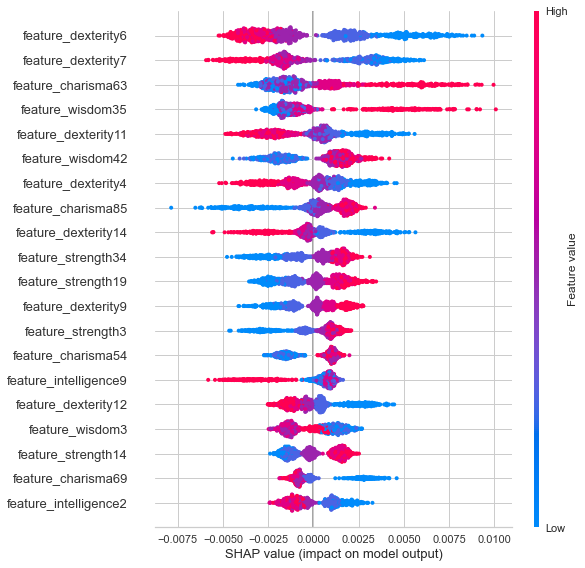

In [40]:
interpret_model(model_loaded)

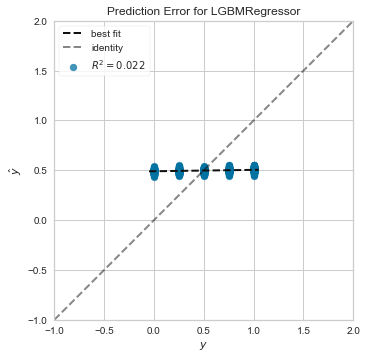

In [51]:
plot_model(model_loaded, plot = 'error')

In [45]:
?plot_model

Signature:
plot_model(
    estimator,
    plot='residuals',
    save=False,
    verbose=True,
    system=True,
)
Docstring:
      
Description:
------------
This function takes a trained model object and returns a plot based on the
test / hold-out set. The process may require the model to be re-trained in
certain cases. See list of plots supported below. 

Model must be created using create_model() or tune_model().

    Example:
    --------
    from pycaret.datasets import get_data
    boston = get_data('boston')
    experiment_name = setup(data = boston,  target = 'medv')
    lr = create_model('lr')
    
    plot_model(lr)

    This will return an residuals plot of a trained Linear Regression model.

Parameters
----------
estimator : object, default = none
A trained model object should be passed as an estimator. 

plot : string, default = residual
Enter abbreviation of type of plot. The current list of plots supported are:

Plot            Name                             
------    

In [41]:
from pycaret.regression import * #feature_wisdom45

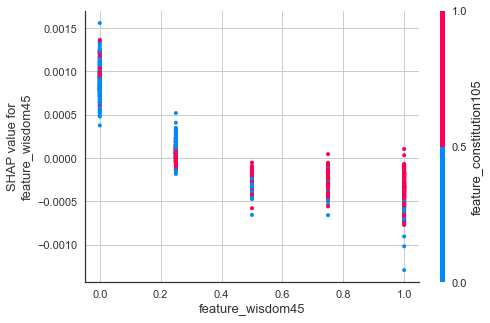

In [44]:
interpret_model(model_loaded, plot='correlation', feature= 'feature_wisdom45')

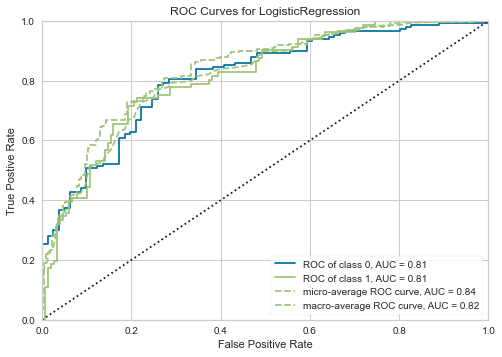

In [36]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Class variable')
# creating a model
lr = create_model('lr')
# plotting a model
plot_model(lr)

In [3]:
import pandas as pd
predictions = pd.DataFrame()


predictions

""


Rascunho

In [ ]:
%%time
#from joblib import parallel_backend

#with parallel_backend('threading', n_jobs=-1):
    # Train the model
    #model = RandomForestClassifier(n_estimators=10, n_jobs=-1)
    #model.fit(df_training[features], encoded_target_train)
    # Test the model
    #y_pred = clf.predict(X_test)
